<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ch-5-Tree-Based-Methods" data-toc-modified-id="Ch-5-Tree-Based-Methods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ch 5 Tree-Based Methods</a></span><ul class="toc-item"><li><span><a href="#Build-a-random-forest-model-for-bike-rentals" data-toc-modified-id="Build-a-random-forest-model-for-bike-rentals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Build a random forest model for bike rentals</a></span></li><li><span><a href="#Predict-bike-rentals-with-the-random-forest-model" data-toc-modified-id="Predict-bike-rentals-with-the-random-forest-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Predict bike rentals with the random forest model</a></span></li><li><span><a href="#Visualize-random-forest-bike-model-predictions" data-toc-modified-id="Visualize-random-forest-bike-model-predictions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualize random forest bike model predictions</a></span></li><li><span><a href="#vtreat-on-a-small-example" data-toc-modified-id="vtreat-on-a-small-example-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>vtreat on a small example</a></span></li><li><span><a href="#New-levels-in-test-data" data-toc-modified-id="New-levels-in-test-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>New levels in test data</a></span></li><li><span><a href="#vtreat-the-bike-rental-data" data-toc-modified-id="vtreat-the-bike-rental-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>vtreat the bike rental data</a></span></li><li><span><a href="#Find-optimal-nr-of-trees-for-GBM" data-toc-modified-id="Find-optimal-nr-of-trees-for-GBM-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Find optimal nr of trees for GBM</a></span></li><li><span><a href="#Fit-GBM-using-xgboost:-bike-rental-model-and-predict" data-toc-modified-id="Fit-GBM-using-xgboost:-bike-rental-model-and-predict-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Fit GBM using xgboost: bike rental model and predict</a></span></li><li><span><a href="#Evaluate-GBM-xgboost-bike-rental-model" data-toc-modified-id="Evaluate-GBM-xgboost-bike-rental-model-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Evaluate GBM xgboost bike rental model</a></span></li><li><span><a href="#Visualize-the-xgboost-bike-rental-model" data-toc-modified-id="Visualize-the-xgboost-bike-rental-model-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Visualize the xgboost bike rental model</a></span></li></ul></li></ul></div>

## Ch 5 Tree-Based Methods
In this chapter we will look at modeling algorithms that do not assume linearity or additivity, and that can learn limited types of interactions among input variables. These algorithms are *tree-based* methods that work by combining ensembles of *decision trees* that are learned from the training data.

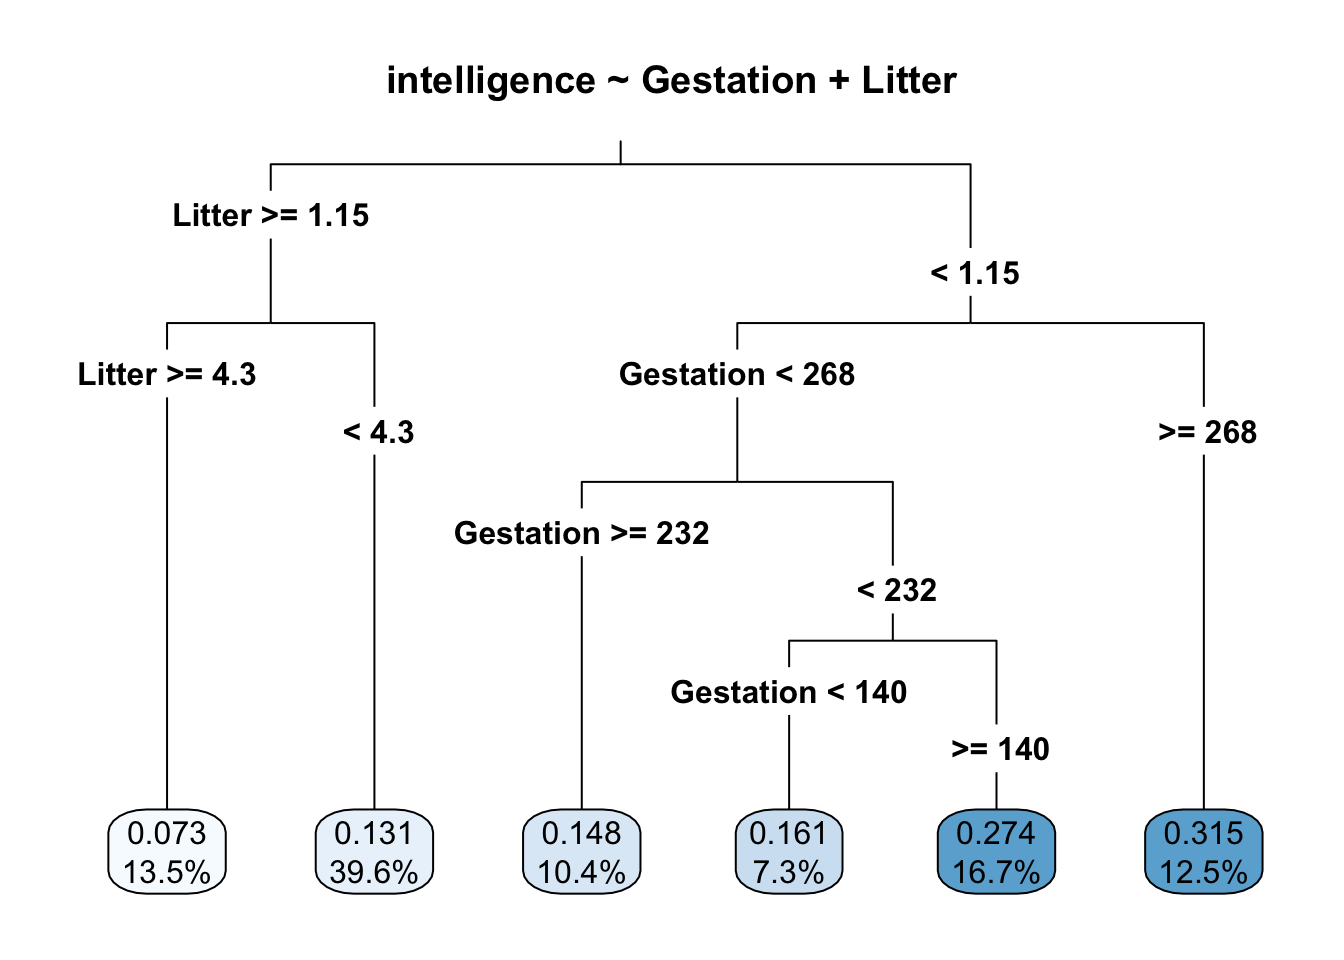

In [6]:
#options(repr.plot.height = 3, repr.plot.width = 4)
IRdisplay::display_png(file="C:/Users/annaa/decisiontree_intelligence.png", height = 600, width = 600)  

Here you see the decision tree learned from the brain data set shown in the previous video. The tree predicts the expected intelligence (humans have an intelligence of 1) of several mammals, as a function of gestation time (in days) and average litter size for that species.

The leaf nodes show the expected brain size for the datums in that node, as well as how many (percentage-wise) of the datums fall into the node.

You want to predict the intelligence of a gorilla, which has a gestation time of 265 days and an average litter size of 1.

What relative brain size does this tree model predict?

Possible Answers
0.073
0.131
0.148
0.161
0.274
0.315

correct: 0.148

### Build a random forest model for bike rentals
In this exercise you will again build a model to predict the number of bikes rented in an hour as a function of the weather, the type of day (holiday, working day, or weekend), and the time of day. You will train the model on data from the month of July.

You will use the ranger package to fit the random forest model. For this exercise, the key arguments to the ranger() call are:
*  formula
*  data
*  num.trees: the number of trees in the forest.
*  respect.unordered.factors : Specifies how to treat unordered factor variables. We recommend setting this to "order" for regression.
*  seed: because this is a random algorithm, you will set the seed to get reproducible results

Since there are a lot of input variables, for convenience we will specify the outcome and the inputs in the variables outcome and vars, and use paste() to assemble a string representing the model formula.

In [27]:
load("data/Bikes.RData")
head(bikesJuly)

hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,instant,mnth,yr
0,FALSE,FALSE,Clear to partly cloudy,0.76,0.7273,0.66,0.0000,149,13004,7,1
1,FALSE,FALSE,Clear to partly cloudy,0.74,0.6970,0.70,0.1343,93,13005,7,1
2,FALSE,FALSE,Clear to partly cloudy,0.72,0.6970,0.74,0.0896,90,13006,7,1
3,FALSE,FALSE,Clear to partly cloudy,0.72,0.7121,0.84,0.1343,33,13007,7,1
4,FALSE,FALSE,Clear to partly cloudy,0.70,0.6667,0.79,0.1940,4,13008,7,1
5,FALSE,FALSE,Clear to partly cloudy,0.68,0.6364,0.79,0.1045,10,13009,7,1


In [12]:
str(bikesJuly)

'data.frame':	744 obs. of  12 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.76 0.74 0.72 0.72 0.7 0.68 0.7 0.74 0.78 0.82 ...
 $ atemp     : num  0.727 0.697 0.697 0.712 0.667 ...
 $ hum       : num  0.66 0.7 0.74 0.84 0.79 0.79 0.79 0.7 0.62 0.56 ...
 $ windspeed : num  0 0.1343 0.0896 0.1343 0.194 ...
 $ cnt       : int  149 93 90 33 4 10 27 50 142 219 ...
 $ instant   : int  13004 13005 13006 13007 13008 13009 13010 13011 13012 13013 ...
 $ mnth      : int  7 7 7 7 7 7 7 7 7 7 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...


In [14]:
# Random seed to reproduce results
seed = 423563
# The outcome column
outcome <- "cnt"
# The input variables
vars <- c("hr", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed")
# Create the formula string for bikes rented as a function of the inputs
(fmla <- paste(outcome, "~", paste(vars, collapse = " + ")))

[1] "cnt ~ hr + holiday + workingday + weathersit + temp + atemp + hum + windspeed"

In [15]:
library(ranger)
# Fit and print the random forest model
(bike_model_rf <- ranger(fmla, # formula 
                         bikesJuly, # data
                         num.trees = 500, 
                         respect.unordered.factors = "order", 
                         seed = seed))

Warning message:
"package 'ranger' was built under R version 3.4.4"

Ranger result

Call:
 ranger(fmla, bikesJuly, num.trees = 500, respect.unordered.factors = "order",      seed = seed) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      744 
Number of independent variables:  8 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
OOB prediction error (MSE):       8230.568 
R squared (OOB):                  0.8205434 

### Predict bike rentals with the random forest model
*  now predict bike rentals for the month of August.
*  predict() function for a ranger model produces a list. One of the elements of this list is predictions, a vector of predicted values. 
    *  You can access predictions with the \$ notation for accessing named elements of a list: **predict(model, data)\$predictions**

In [19]:
library(ggplot2)
library(dplyr)
# bikesAugust is in the workspace
str(bikesAugust)

'data.frame':	744 obs. of  13 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.68 0.66 0.64 0.64 0.64 0.64 0.64 0.64 0.66 0.68 ...
 $ atemp     : num  0.636 0.606 0.576 0.576 0.591 ...
 $ hum       : num  0.79 0.83 0.83 0.83 0.78 0.78 0.78 0.83 0.78 0.74 ...
 $ windspeed : num  0.1642 0.0896 0.1045 0.1045 0.1343 ...
 $ cnt       : int  47 33 13 7 4 49 185 487 681 350 ...
 $ instant   : int  13748 13749 13750 13751 13752 13753 13754 13755 13756 13757 ...
 $ mnth      : int  8 8 8 8 8 8 8 8 8 8 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pred      : num  77.4 36.2 38.3 28.2 42.2 ...


rmse
97.18347


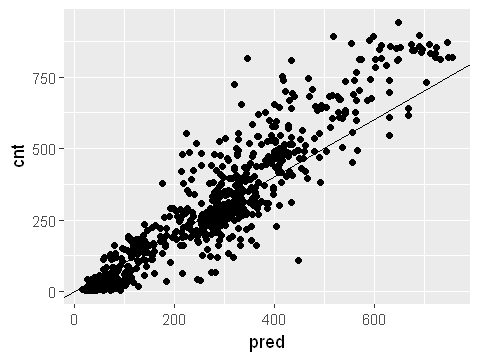

In [20]:
# Make predictions on the August data
bikesAugust$pred <- predict(bike_model_rf, bikesAugust)$predictions

# Calculate the RMSE of the predictions compared to the actual bike rental counts (cnt) 
bikesAugust %>% 
  mutate(residual = cnt - pred)  %>% # calculate the residual
  summarize(rmse  = sqrt( mean(residual^2) ) ) # calculate rmse

# Plot actual outcome vs predictions (predictions on x-axis)
ggplot(bikesAugust, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

This random forest model outperforms the poisson count model on the same data; it is discovering more complex non-linear or non-additive relationships in the data.

### Visualize random forest bike model predictions
In the previous exercise, you saw that the random forest bike model did better on the August data than the quasiposson model, in terms of RMSE.

*  now visualize the random forest model's August predictions as a function of time. The corresponding plot from the quasipoisson model that you built in a previous exercise is in the workspace for you to compare.
*  Recall that the quasipoisson model mostly identified the pattern of slow and busy hours in the day, but it somewhat underestimated peak demands. You would like to see how the random forest model compares.

### vtreat on a small example
*  use **vtreat to one-hot-encode a categorical variable** on a small example. 
*  vtreat creates a treatment plan to transform categorical variables into indicator variables (coded "lev"), and to clean bad values out of numerical variables (coded "clean").
*  To design a treatment plan use the function **designTreatmentsZ()**
*  treatplan <- **designTreatmentsZ(data, varlist)**
    *  **data:** the original training data frame
    *  **varlist:** a vector of input (categorical) variables to be treated (as strings).
        *  **designTreatmentsZ() returns a list with an element scoreFrame:** a data frame that includes the **names and types of the new variables**, ex. 1
    *  varName: the name of the new treated variable
    *  origName: the name of the original variable that the treated variable comes from
    *  code: the type of the new variable.
        *  "clean": a numerical variable with no NAs or NaNs
        *  "lev": an indicator variable for a specific level of the original categorical variable.
    *  (magrittr::use_series() is an alias for \$ that you can use in pipes.)
*  For these exercises, we want varName where code is either "clean" or "lev", ex. 2
*  **To transform the data set into all numerical and one-hot-encoded variables, use prepare()**, ex. 3
    *  treatplan: the treatment plan
    *  data: the data frame to be treated
    *  varRestrictions: the variables desired in the treated data    

In [6]:
# Ex. 1
#scoreFrame <- treatplan %>% 
#            magrittr::use_series(scoreFrame) %>% 
#            select(varName, origName, code)
# Ex. 2
#newvarlist <- scoreFrame %>% 
#             filter(code %in% c("clean", "lev") %>%
#             magrittr::use_series(varName)
# Ex. 3
#data.treat <- prepare(treatplan, data, varRestrictions = newvarlist)

In [19]:
dframe = data.frame(color = c("b", "r","r","r","r", "b", "r", "g", "b", "b"), size = c(13,11,15,14,NA,11,9,12,7,12), 
           popularity = c(1.07, 1.39, 0.92, 1.2, 1.08, 0.8, 1.1, 0.87, 0.69, 0.88))
dframe

color,size,popularity
b,13,1.07
r,11,1.39
r,15,0.92
r,14,1.20
r,NA,1.08
b,11,0.80
r,9,1.10
g,12,0.87
b,7,0.69
b,12,0.88


In [18]:
mean(c(13,11,15,14,NA,11,9,12,7,12), na.rm = TRUE)

[1] 11.55556

In [20]:
# We will assume that color and size are input variables, and popularity is the outcome to be predicted.
# Load the package vtreat
library(vtreat)
library(magrittr)
library(dplyr)
# Create the treatment plan
treatplan <- designTreatmentsZ(dframe, c("color", "size")) 
# size is numerical, but it would replace NA values with mean of the column

[1] "vtreat 1.0.3 inspecting inputs Thu Apr 05 10:23:18 2018"
[1] "designing treatments Thu Apr 05 10:23:18 2018"
[1] " have initial level statistics Thu Apr 05 10:23:18 2018"
[1] "design var color Thu Apr 05 10:23:18 2018"
[1] "design var size Thu Apr 05 10:23:18 2018"
[1] " scoring treatments Thu Apr 05 10:23:18 2018"
[1] "have treatment plan Thu Apr 05 10:23:18 2018"


In [21]:
# Examine the scoreFrame to see the mapping from old variables to new variables.
scoreFrame

varName,origName,code
color_catP,color,catP
size_clean,size,clean
color_lev_x.b,color,lev
color_lev_x.g,color,lev
color_lev_x.r,color,lev


In [22]:
# We only want the rows with codes "clean" or "lev"
(newvars <- scoreFrame %>%
    filter(code %in% c("clean", "lev") ) %>%
    use_series(varName))

[1] "size_clean"    "color_lev_x.b" "color_lev_x.g" "color_lev_x.r"

In [23]:
# Create the treated training data
(dframe.treat <- prepare(treatplan, dframe, varRestriction = newvars))

size_clean,color_lev_x.b,color_lev_x.g,color_lev_x.r
13.00000,1,0,0
11.00000,0,0,1
15.00000,0,0,1
14.00000,0,0,1
11.55556,0,0,1
11.00000,1,0,0
9.00000,0,0,1
12.00000,0,1,0
7.00000,1,0,0
12.00000,1,0,0


I have one-hot-encoded categorical data. The new indicator variables have '_lev_' in their names, and the new cleaned continuous variables have '_clean' in their names. 
*  The treated data is all numerical, with no NAs, and is suitable for use with xgboost and other R modeling functions.

### New levels in test data
When a level of a categorical variable is rare, sometimes it will fail to show up in training data. 
*  If that rare level then appears in test data, downstream models may not know what to do with it. 
*  When new levels appear, using model.matrix or caret::dummyVars to one-hot-encode will not work correctly.
*  **vtreat is a "safer" alternative to model.matrix for one-hot-encoding**, because it can manage new levels safely. 

In [24]:
testframe = data.frame(color = c("g", "g", "y", "g", "g","y","b","g","g","r"), size = c(7,8,10,12,6,8,NA,12,12,8), 
                       popularity = c(0.97, 0.91, 1.42, 1.19, 0.98, 1.36, 1.09, 0.91, 1, 1.3))
testframe

color,size,popularity
g,7,0.97
g,8,0.91
y,10,1.42
g,12,1.19
g,6,0.98
y,8,1.36
b,NA,1.09
g,12,0.91
g,12,1.00
r,8,1.30


In [25]:
# treatplan is in the workspace
summary(treatplan)
# newvars is in the workspace
newvars

              Length Class           Mode     
treatments    4      -none-          list     
scoreFrame    8      data.frame      list     
outcomename   1      -none-          character
vtreatVersion 1      package_version list     
outcomeType   1      -none-          character
outcomeTarget 1      -none-          character
meanY         1      -none-          logical  
splitmethod   1      -none-          character

[1] "size_clean"    "color_lev_x.b" "color_lev_x.g" "color_lev_x.r"

In [26]:
# Use prepare() to one-hot-encode testframe
(testframe.treat <- prepare(treatplan, testframe, varRestriction = newvars))

size_clean,color_lev_x.b,color_lev_x.g,color_lev_x.r
7.00000,0,1,0
8.00000,0,1,0
10.00000,0,0,0
12.00000,0,1,0
6.00000,0,1,0
8.00000,0,0,0
11.55556,1,0,0
12.00000,0,1,0
12.00000,0,1,0
8.00000,0,0,1


*  vtreat encodes novel colors like yellow that were not present in the data as **all zeros: 'none of the known levels'**. 
*  This allows downstream models to accept these novel values without crashing.

### vtreat the bike rental data
*  create one-hot-encoded data frames of the July/August bike data, for use with xgboost later on.
*  use data frames bikesJuly and bikesAugust

In [28]:
head(bikesJuly, 3)
head(bikesAugust, 3)

hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,instant,mnth,yr
0,FALSE,FALSE,Clear to partly cloudy,0.76,0.7273,0.66,0.0000,149,13004,7,1
1,FALSE,FALSE,Clear to partly cloudy,0.74,0.6970,0.70,0.1343,93,13005,7,1
2,FALSE,FALSE,Clear to partly cloudy,0.72,0.6970,0.74,0.0896,90,13006,7,1


hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,instant,mnth,yr
0,FALSE,TRUE,Clear to partly cloudy,0.68,0.6364,0.79,0.1642,47,13748,8,1
1,FALSE,TRUE,Clear to partly cloudy,0.66,0.6061,0.83,0.0896,33,13749,8,1
2,FALSE,TRUE,Clear to partly cloudy,0.64,0.5758,0.83,0.1045,13,13750,8,1


In [29]:
# The outcome column
outcome <- "cnt"
# The input columns
vars <- c("hr", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed")
# Create the treatment plan from bikesJuly (the training data)
treatplan <- designTreatmentsZ(bikesJuly, vars, verbose = FALSE) # means: dont't print out progress

# Get the "clean" and "lev" variables from the scoreFrame
(newvars <- treatplan %>%
  use_series(scoreFrame) %>%        
  filter(code %in% c("clean", "lev")) %>%  # get the rows you care about
  use_series(varName))           # get the varName column

[1] "holiday_clean"                          
 [2] "workingday_clean"                       
 [3] "temp_clean"                             
 [4] "atemp_clean"                            
 [5] "hum_clean"                              
 [6] "windspeed_clean"                        
 [7] "hr_lev_x.0"                             
 [8] "hr_lev_x.1"                             
 [9] "hr_lev_x.10"                            
[10] "hr_lev_x.11"                            
[11] "hr_lev_x.12"                            
[12] "hr_lev_x.13"                            
[13] "hr_lev_x.14"                            
[14] "hr_lev_x.15"                            
[15] "hr_lev_x.16"                            
[16] "hr_lev_x.17"                            
[17] "hr_lev_x.18"                            
[18] "hr_lev_x.19"                            
[19] "hr_lev_x.2"                             
[20] "hr_lev_x.20"                            
[21] "hr_lev_x.21"                            
[22] "hr_lev_x.22"                            
[23] "hr_lev_x.23"                            
[24] "hr_lev_x.3"                             
[25] "hr_lev_x.4"                             
[26] "hr_lev_x.5"                             
[27] "hr_lev_x.6"                             
[28] "hr_lev_x.7"                             
[29] "hr_lev_x.8"                             
[30] "hr_lev_x.9"                             
[31] "weathersit_lev_x.Clear.to.partly.cloudy"
[32] "weathersit_lev_x.Light.Precipitation"   
[33] "weathersit_lev_x.Misty"

In [31]:
# Prepare the training data
bikesJuly.treat <- prepare(treatplan, bikesJuly,  varRestriction = newvars)

# Prepare the test data
bikesAugust.treat <- prepare(treatplan, bikesAugust,  varRestriction = newvars)

# Call str() on the treated data
str(bikesJuly.treat)

'data.frame':	744 obs. of  33 variables:
 $ holiday_clean                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ workingday_clean                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ temp_clean                             : num  0.76 0.74 0.72 0.72 0.7 0.68 0.7 0.74 0.78 0.82 ...
 $ atemp_clean                            : num  0.727 0.697 0.697 0.712 0.667 ...
 $ hum_clean                              : num  0.66 0.7 0.74 0.84 0.79 0.79 0.79 0.7 0.62 0.56 ...
 $ windspeed_clean                        : num  0 0.1343 0.0896 0.1343 0.194 ...
 $ hr_lev_x.0                             : num  1 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.1                             : num  0 1 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.10                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.11                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.12                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.13                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_le

In [32]:
str(bikesAugust.treat)

'data.frame':	744 obs. of  33 variables:
 $ holiday_clean                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ workingday_clean                       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ temp_clean                             : num  0.68 0.66 0.64 0.64 0.64 0.64 0.64 0.64 0.66 0.68 ...
 $ atemp_clean                            : num  0.636 0.606 0.576 0.576 0.591 ...
 $ hum_clean                              : num  0.79 0.83 0.83 0.83 0.78 0.78 0.78 0.83 0.78 0.74 ...
 $ windspeed_clean                        : num  0.1642 0.0896 0.1045 0.1045 0.1343 ...
 $ hr_lev_x.0                             : num  1 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.1                             : num  0 1 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.10                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.11                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.12                            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_lev_x.13                            : num  0 0 0 0 0 0 0 0 0 0 ..

The bike data is now in completely numeric form, ready to use with xgboost. 
*  Note that the treated data does not include the outcome column.

### Find optimal nr of trees for GBM
*  get ready to build a GBM to **predict nr of bikes rented in an hour as a function of weather, bike type and time of day**. You will **train the model on data from the month of July**.
*  bikesJuly.treat doesn't have the outcome column, so you get it from untreated data: bikesJuly\$cnt.
*  use xgboost package to fit the random forest model. 
*  The function **xgb.cv() uses CV to estimate the $\lambda$ = learning rate, as each new tree is added to the model. 
*  **optimal nr of trees is the one that minimizes the holdout (=test) RMSE.**

For this exercise, the key arguments to the **xgb.cv()** call are:
*  data: a numeric matrix.
*  label: vector of outcomes (also numeric).
*  nrounds: the maximum number of rounds (trees to build).
*  nfold: the number of folds for the cross-validation. 5 is a good number.
*  objective: "reg:linear" for continuous outcomes.
*  eta: the learning rate.
*  max_depth: depth of trees.
*  early_stopping_rounds: after this many rounds without improvement, stop.
*  verbose: 0 to not print progress.

In [34]:
# Load the package xgboost
library(xgboost)

# Run xgb.cv
cv <- xgb.cv(data = as.matrix(bikesJuly.treat), 
            label = bikesJuly$cnt,
            nrounds = 100,
            nfold = 5,
            objective = "reg:linear",
            eta = 0.3,
            max_depth = 6,
            early_stopping_rounds = 10,
            verbose = 0    # silent
)
summary(cv)

                Length Class      Mode   
call            10     -none-     call   
params           4     -none-     list   
callbacks        2     -none-     list   
evaluation_log   5     data.table list   
niter            1     -none-     numeric
folds            5     -none-     list   
best_iteration   1     -none-     numeric
best_ntreelimit  1     -none-     numeric

In [37]:
# Get the evaluation log 
elog <- cv$evaluation_log
#head(elog)
# Determine and print how many trees minimize training and test error
ntrees = elog %>% 
   summarize(ntrees.train = which.min(train_rmse_mean),   # find the index of min(train_rmse_mean)
             ntrees.test  = which.min(test_rmse_mean))   # find the index of min(test_rmse_mean)
ntrees # data.frame

ntrees.train,ntrees.test
97,87


**In most cases, ntrees.test is less than ntrees.train**. 
*  training error keeps decreasing even after the test error starts to increase. 
*  It's important to use CV to find optimal nr of trees (as determined by ntrees.test) and avoid overfitting.

### Fit GBM using xgboost: bike rental model and predict
*  fit GBM model using xgboost() to predict nr of bikes rented in an hour as a function of the weather, bike type and time of day. 
*  train the model on July and predict on August.
*  vtreat-ed data doesn't have the outcome column, so you get it from the original data (the cnt column).
*  **The arguments to xgboost() are similar to those of xgb.cv().**

In [38]:
ntrees$ntrees.test

[1] 87

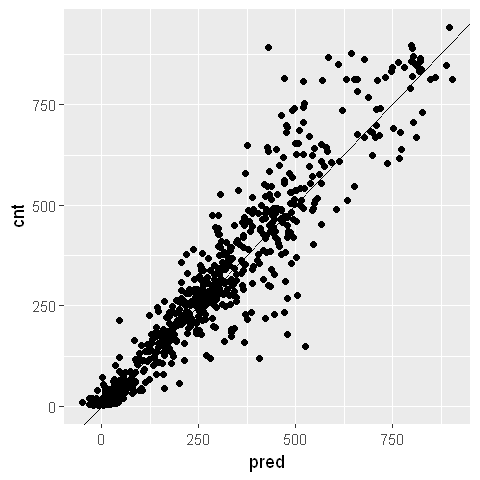

In [44]:
# Run xgboost
bike_model_xgb <- xgboost(data = as.matrix(bikesJuly.treat), # training data as matrix
                   label = bikesJuly$cnt,  # column of outcomes
                   nrounds = ntrees$ntrees.test,       # number of trees to build
                   objective = "reg:linear", # objective
                   eta = 0.3,
                   depth = 6,
                   verbose = 0)

# Make predictions
bikesAugust$pred <- predict(bike_model_xgb, as.matrix(bikesAugust.treat))

# Plot predictions (on x axis) vs actual bike rental count
library(ggplot2)
options(repr.plot.height = 4, repr.plot.width = 4)
ggplot(bikesAugust, aes(x = pred, y = cnt)) + geom_point() + geom_abline()

*  Overall, the scatterplot looks good, but the model made some negative predictions!
*  let's compare this model's RMSE to the previous bike models.

### Evaluate GBM xgboost bike rental model
*  compare *bike_model_xgb* model's RMSE for August to the RMSE of previous models that you've built.
*  predictions made using the xgboost model are in the column pred.

In [45]:
# How does it compare to the RMSE from the poisson model (approx. 112.6) and the random forest model (approx. 96.7)?
# Calculate RMSE
bikesAugust %>%
  mutate(residuals = cnt - pred) %>%
  summarize(rmse = sqrt(mean(residuals^2)))

rmse
76.59275


Even though GBM made some negative predictions, overall it makes smaller errors than the previous two models. Perhaps rounding negative predictions up to zero is a reasonable tradeoff.

### Visualize the xgboost bike rental model
You've now seen three different ways to model the bike rental data. FGBM model had the smallest RMSE. 
*  let's compare the GBM model's predictions to the other two models as a function of time.